In [4]:
from aocd.models import Puzzle

puzzle = Puzzle(year=2023, day=10)

def parses(input):
    table = str.maketrans("|-JL7F.", "│─┘└┐┌ ")
    return [list(line.translate(table)) for line in input.strip().split('\n')]

data = parses(puzzle.input_data)

In [5]:
def printmap(data, pos=None):
    print('\n'.join([''.join([c if i+j*1j != pos else 'X' 
                     for j, c in enumerate(line)]) 
            for i, line in enumerate(data)]))

In [6]:
sample = parses("""-L|F7
7S-7|
L|7||
-L-J|
L|-JF""")
printmap(sample)

─└│┌┐
┐S─┐│
└│┐││
─└─┘│
└│─┘┌


In [7]:
sample2 = parses("""7-F7-
.FJ|7
SJLL7
|F--J
LJ.LJ
""")
printmap(sample2)

┐─┌┐─
 ┌┘│┐
S┘└└┐
│┌──┘
└┘ └┘


In [8]:
def find_boundary(data):
    DIRECTIONS = { # map of tile, to exit directions
        '│': [1,-1],
        '─': [1j,-1j],
        '┘': [-1j, -1],
        '└': [1j,-1],
        '┐': [-1j,1],
        '┌': [1j,1],
    }
    # first dim is vertical, second horizontal
    exits = {}
    for tile, (d1, d2) in DIRECTIONS.items():
        exits[tile, -d1] = d2
        exits[tile, -d2] = d1
    
    # build map
    map_ = {}
    for i, row in enumerate(data):
        for j, val in enumerate(row):
            if val != ' ':
                map_[i + 1j*j] = val
            if val == 'S':
                start = i + 1j*j
    
    for direction in [1, -1, 1j, -1j]:
        initial_dir = direction
        current = start
        boundary = {}
        while True:
            neighbor = current + direction

            if neighbor not in map_:
                break
            
            if map_[neighbor] == 'S':
                
                exits_to_tile = {}
                for tile, (d1, d2) in DIRECTIONS.items():
                    exits_to_tile[d1,d2] = tile
                    exits_to_tile[d2,d1] = tile
                start_tile = exits_to_tile[initial_dir, -direction]
                
                boundary[neighbor] = start_tile
                
                return boundary
                
                
            state = (map_[neighbor], direction)

            if (map_[neighbor], direction) not in exits:
                break
            
            current = neighbor
            direction = exits[map_[neighbor], direction]
            boundary[current] = map_[current]
        

In [9]:
def solve_a(data):
    boundary = find_boundary(data)
    return len(boundary) // 2

In [10]:
solve_a(sample) == 4

True

In [11]:
solve_a(sample2) == 8

True

In [12]:
def print_boundary(data, boundary):
    N, M = len(data), len(data[0])
    print('\n'.join((
        ''.join(boundary.get(i+j*1j, ' ') for j in range(M))
        for i in range(N)
    )))

In [13]:
sample3 = parses("""...........
.S-------7.
.|F-----7|.
.||.....||.
.||.....||.
.|L-7.F-J|.
.|..|.|..|.
.L--J.L--J.
...........""")
printmap(sample3)

           
 S───────┐ 
 │┌─────┐│ 
 ││     ││ 
 ││     ││ 
 │└─┐ ┌─┘│ 
 │  │ │  │ 
 └──┘ └──┘ 
           


In [14]:
sample4 = parses(""".F----7F7F7F7F-7....
.|F--7||||||||FJ....
.||.FJ||||||||L7....
FJL7L7LJLJ||LJ.L-7..
L--J.L7...LJS7F-7L7.
....F-J..F7FJ|L7L7L7
....L7.F7||L7|.L7L7|
.....|FJLJ|FJ|F7|.LJ
....FJL-7.||.||||...
....L---J.LJ.LJLJ...""")
printmap(sample4)

 ┌────┐┌┐┌┐┌┐┌─┐    
 │┌──┐││││││││┌┘    
 ││ ┌┘││││││││└┐    
┌┘└┐└┐└┘└┘││└┘ └─┐  
└──┘ └┐   └┘S┐┌─┐└┐ 
    ┌─┘  ┌┐┌┘│└┐└┐└┐
    └┐ ┌┐││└┐│ └┐└┐│
     │┌┘└┘│┌┘│┌┐│ └┘
    ┌┘└─┐ ││ ││││   
    └───┘ └┘ └┘└┘   


In [15]:
sample5 = parses("""FF7FSF7F7F7F7F7F---7
L|LJ||||||||||||F--J
FL-7LJLJ||||||LJL-77
F--JF--7||LJLJ7F7FJ-
L---JF-JLJ.||-FJLJJ7
|F|F-JF---7F7-L7L|7|
|FFJF7L7F-JF7|JL---7
7-L-JL7||F7|L7F-7F7|
L.L7LFJ|||||FJL7||LJ
L7JLJL-JLJLJL--JLJ.L""")
printmap(sample5)

┌┌┐┌S┌┐┌┐┌┐┌┐┌┐┌───┐
└│└┘││││││││││││┌──┘
┌└─┐└┘└┘││││││└┘└─┐┐
┌──┘┌──┐││└┘└┘┐┌┐┌┘─
└───┘┌─┘└┘ ││─┌┘└┘┘┐
│┌│┌─┘┌───┐┌┐─└┐└│┐│
│┌┌┘┌┐└┐┌─┘┌┐│┘└───┐
┐─└─┘└┐││┌┐│└┐┌─┐┌┐│
└ └┐└┌┘│││││┌┘└┐││└┘
└┐┘└┘└─┘└┘└┘└──┘└┘ └


In [16]:
def solve_b(data):
    HIRES = { # map of tile, to exit directions
        '│': [[0,1,0],[0,1,0],[0,1,0]],
        '─': [[0,0,0],[1,1,1],[0,0,0]],
        '┘': [[0,1,0],[1,1,0],[0,0,0]],
        '└': [[0,1,0],[0,1,1],[0,0,0]],
        '┐': [[0,0,0],[1,1,0],[0,1,0]],
        '┌': [[0,0,0],[0,1,1],[0,1,0]],
        ' ': [[0,0,0],[0,0,0],[0,0,0]],
    }
    
    boundary = find_boundary(data)
    N, M = len(data), len(data[0])
    
    # build hi-res map
    rows = []
    for i in range(N):
        blocks = []
        for j in range(M):
            tile = boundary.get(i+1j*j, ' ')
            blocks.append(np.array(HIRES[tile]))
        rows.append(np.hstack(blocks))
    map_ = np.vstack(rows).astype(np.uint8)
    
    # flood fill from top left corner
    visited = set([(0,0)])
    stack = [(0,0)]

    while stack:
        x, y = stack.pop()

        for dx, dy in [(0,1),(0,-1),(1,0),(-1,0)]:
            x2, y2 = x + dx, y + dy
            if not (0 <= x2 < 3*N and 0 <= y2 < 3*M):
                continue
            if map_[x2,y2] == 0:
                map_[x2,y2] = 2
                stack.append((x2,y2))
    
    inside = 0
    for i in range(N):
        for j in range(M):
            I, J = 3*i, 3*j
            block = map_[I:I+3,J:J+3]
            if np.all(block == 0):
                inside += 1
    plt.imshow(map_, cmap='magma')
#     from PIL import Image
#     display(Image.fromarray(127*map_))
    return inside

In [ ]:
sample5 = parses("""FLF""")

True

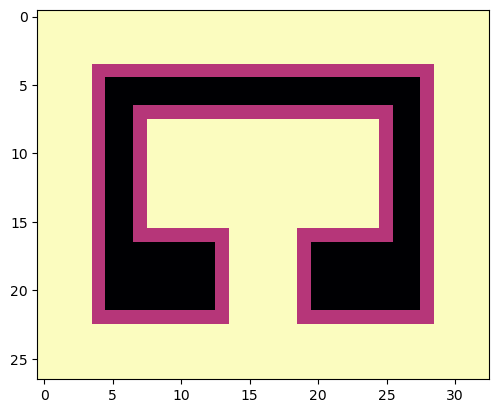

In [17]:
solve_b(sample3) == 4

True

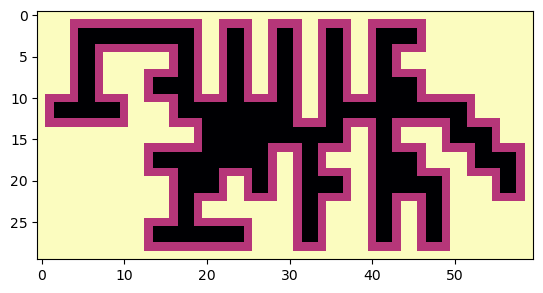

In [18]:
solve_b(sample4) == 8

True

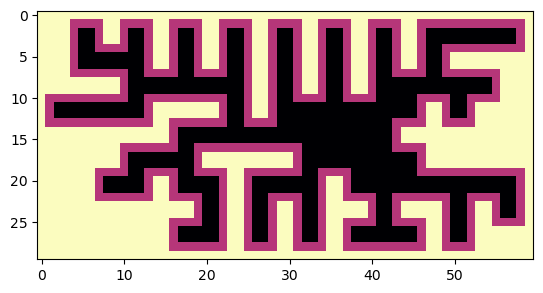

In [19]:
solve_b(sample5) == 10

337

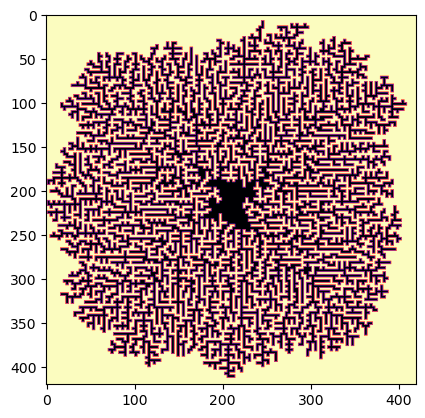

In [20]:
solve_b(data)

In [21]:
# picks theorem: inside + boundary/2 - 1 = area

In [22]:
data = sample5

In [23]:
def solve_b_math(data):
    boundary = [(x.real, x.imag) for x in find_boundary(data)]
    

    # area via Shoelace formula - https://en.wikipedia.org/wiki/Shoelace_formula
    points = boundary + [boundary[0]]
    area = 1/2 * abs(sum(x1 * y2 - y1 * x2 for (x1, y1), (x2, y2) in zip(points, points[1:])))
    
    # pick's thm - area = inside + boundary/2 - 1
    inside = area - len(boundary) / 2 + 1
    return int(inside)

In [57]:
boundary = find_boundary(data)

In [76]:
def solve_b_flip(data):
    total = 0
    N, M = len(data), len(data[0])
    boundary = {(int(z.real), int(z.imag)): val for z, val in find_boundary(data).items()}
    for i in range(N):
        inside = False
        for j in range(M):
            total += ((i,j) not in boundary) and inside
            inside ^= boundary.get((i,j), ' ') in ('│┘└')
    return total

In [77]:
solve_b_flip(sample3)

4

In [78]:
solve_b_flip(sample4)

8

In [79]:
solve_b_flip(sample5)

10

In [49]:
solve_b_math(sample3)

4

In [50]:
solve_b_math(sample4)

8

In [51]:
solve_b_math(sample5)

10

In [127]:
solve_b_math(data)

337

In [100]:
n_boundary, area

(46, 26.0)

In [85]:
boundary

{(2+1j): '│',
 (3+1j): '│',
 (4+1j): '│',
 (5+1j): '│',
 (6+1j): '│',
 (7+1j): '└',
 (7+2j): '─',
 (7+3j): '─',
 (7+4j): '┘',
 (6+4j): '│',
 (5+4j): '┐',
 (5+3j): '─',
 (5+2j): '└',
 (4+2j): '│',
 (3+2j): '│',
 (2+2j): '┌',
 (2+3j): '─',
 (2+4j): '─',
 (2+5j): '─',
 (2+6j): '─',
 (2+7j): '─',
 (2+8j): '┐',
 (3+8j): '│',
 (4+8j): '│',
 (5+8j): '┘',
 (5+7j): '─',
 (5+6j): '┌',
 (6+6j): '│',
 (7+6j): '└',
 (7+7j): '─',
 (7+8j): '─',
 (7+9j): '┘',
 (6+9j): '│',
 (5+9j): '│',
 (4+9j): '│',
 (3+9j): '│',
 (2+9j): '│',
 (1+9j): '┐',
 (1+8j): '─',
 (1+7j): '─',
 (1+6j): '─',
 (1+5j): '─',
 (1+4j): '─',
 (1+3j): '─',
 (1+2j): '─',
 (1+1j): '┌'}